In [38]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [39]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import MultiLabelBinarizer as mlb

In [89]:
df = pd.read_json("Data/train.json")
df.to_csv("train.csv")
df=pd.read_csv("train.csv")

In [90]:
data = df.iloc[: , 1:]

In [91]:
data.columns
data.shape

(12129, 7)

In [92]:
author_freq=(data["authorId"].value_counts())/data.shape[0]

In [93]:
from matplotlib import pyplot as plt
import numpy as np

In [94]:
print(author_freq)

1750769       0.001072
1747849       0.001072
51042088      0.000989
2854981       0.000989
3422953       0.000907
                ...   
40192974      0.000082
2013172       0.000082
2106294609    0.000082
5677323       0.000082
144928136     0.000082
Name: authorId, Length: 5625, dtype: float64


(array([5625.]),
 array([8.24470278e-05, 1.00008245e+00]),
 <BarContainer object of 1 artists>)

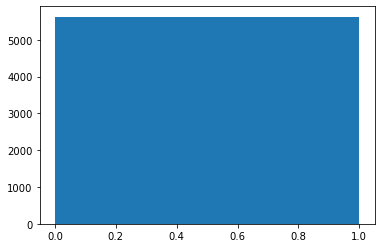

In [95]:
import numpy as np

plt.hist(author_freq, bins=np.arange(author_freq.min(), author_freq.max()+1))


(array([  78.,   77.,   75.,  178.,  312.,  292.,  152.,   86., 3715.,
        7164.]),
 array([1979. , 1983.3, 1987.6, 1991.9, 1996.2, 2000.5, 2004.8, 2009.1,
        2013.4, 2017.7, 2022. ]),
 <BarContainer object of 10 artists>)

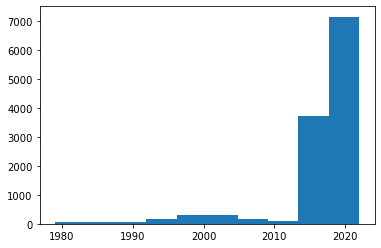

In [96]:
plt.hist(data["year"])

In [97]:
print('\033[93m Info:\033[30m')
print(data.info())
print('\033[93m Nan of each column:\033[30m')
print(data.isna().sum())
print('\033[93m Count of unique author:\033[30m', end=' ')
print(len(data.authorName.unique()))


# Preview data
data.head()

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12129 entries, 0 to 12128
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   paperId     12129 non-null  object
 1   title       12129 non-null  object
 2   authorId    12129 non-null  int64 
 3   authorName  12129 non-null  object
 4   abstract    12129 non-null  object
 5   year        12129 non-null  int64 
 6   venue       11887 non-null  object
dtypes: int64(2), object(5)
memory usage: 663.4+ KB
None
 Nan of each column:
paperId         0
title           0
authorId        0
authorName      0
abstract        0
year            0
venue         242
dtype: int64
 Count of unique author: 5511


,paperId,title,authorId,authorName,abstract,year,venue
0,0b341b6938308a6d5f47edf490f6e46eae3835fa,Detecting linguistic idiosyncratic interests i...,3188285,Masoud Rouhizadeh,Children with autism spectrum disorder often e...,2014,CLPsych@ACL
1,c682727ee058aadbe9dbf838dcb036322818f588,Bigrams and BiLSTMs Two Neural Networks for Se...,2782720,Yuri Bizzoni,We present and compare two alternative deep ne...,2018,Fig-Lang@NAACL-HLT
2,0f9b5b32229a7245e43754430c0c88f8e7f0d8af,In Factuality: Efficient Integration of Releva...,144748442,Peter Vickers,Visual Question Answering (VQA) methods aim at...,2021,ACL
3,7e8b4cfdc03b59ece2d6b33a217f0abd47f708d9,Variational Graph Autoencoding as Cheap Superv...,46331602,Irene Li,Coreference resolution over semantic graphs li...,2022,ACL
4,07588dd5d0252c7abc99b3834a81bf23741ead4b,LIMIT-BERT : Linguistics Informed Multi-Task BERT,30887404,Junru Zhou,"In this paper, we present Linguistics Informed...",2019,FINDINGS


In [98]:
data['abstract_title']=data["abstract"].astype(str)+" "+ data["title"].astype(str)

In [99]:
for i in data['abstract_title'][:1]:
    print(i[-10000:])

Children with autism spectrum disorder often exhibit idiosyncratic patterns of behaviors and interests. In this paper, we focus on measuring the presence of idiosyncratic interests at the linguistic level in children with autism using distributional semantic models. We model the semantic space of children’s narratives by calculating pairwise word overlap, and we compare the overlap found within and across diagnostic groups. We find that the words used by children with typical development tend to be used by other children with typical development, while the words used by children with autism overlap less with those used by children with typical development and even less with those used by other children with autism. These findings suggest that children with autism are veering not only away from the topic of the target narrative but also in idiosyncratic semantic directions potentially defined by their individual topics of interest. Detecting linguistic idiosyncratic interests in autism 

In [100]:
from os import walk
from os import path
# --------- Data processing --------- #
import numpy as np # linear algebra
import pandas as pd
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# --------- Model design --------- #
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras import Sequential
# --------- Visualization --------- #
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
!pip install textblob      #for installation

import textblob            #to import
from textblob import TextBlob

In [101]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/Ulyasha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [127]:
data_1=data
data_2=data

Dropping Duplicates for training 

In [128]:
data_tr = data_1.drop_duplicates()
data_tr[:2]

,paperId,title,authorId,authorName,abstract,year,venue,abstract_title
0,0b341b6938308a6d5f47edf490f6e46eae3835fa,Detecting linguistic idiosyncratic interests i...,3188285,Masoud Rouhizadeh,Children with autism spectrum disorder often e...,2014,CLPsych@ACL,child autism spectrum disord exhibit idiosyncr...
1,c682727ee058aadbe9dbf838dcb036322818f588,Bigrams and BiLSTMs Two Neural Networks for Se...,2782720,Yuri Bizzoni,We present and compare two alternative deep ne...,2018,Fig-Lang@NAACL-HLT,present compar altern deep neural architectur ...


Creating Validation set with unseed authors whoose Id was present in training set

In [129]:

data_val= data_2.drop(data_tr.paperId, errors='ignore', axis=0)
data_val[:2]

,paperId,title,authorId,authorName,abstract,year,venue,abstract_title
0,0b341b6938308a6d5f47edf490f6e46eae3835fa,Detecting linguistic idiosyncratic interests i...,3188285,Masoud Rouhizadeh,Children with autism spectrum disorder often e...,2014,CLPsych@ACL,child autism spectrum disord exhibit idiosyncr...
1,c682727ee058aadbe9dbf838dcb036322818f588,Bigrams and BiLSTMs Two Neural Networks for Se...,2782720,Yuri Bizzoni,We present and compare two alternative deep ne...,2018,Fig-Lang@NAACL-HLT,present compar altern deep neural architectur ...


All data for model building

In [113]:
def process_row(row):
    import re
    from textblob import Word
    from string import punctuation
    from nltk.stem.snowball import SnowballStemmer
    from gensim.parsing.preprocessing import STOPWORDS
    
    
    #Mail address
    row = re.sub('(\S+@\S+)(com|\s+com)', ' ', row)
    #Username
    row = re.sub('(\S+@\S+)', ' ', row)
    #punctuation & Lower case
    punctuation = punctuation + '\n' + '—“,”‘-’' #+ '0123456789'
    row = ''.join(word.lower() for word in row if word not in punctuation)
    #Stopwords & Lemma
    stop = STOPWORDS
    row = ' '.join(Word(word).lemmatize() for word in row.split() if word not in stop)
    #Stemming
    stemmer = SnowballStemmer(language='english')
    row = ' '.join([stemmer.stem(word) for word in row.split() if len(word) > 2])
    #Extra whitespace
    row = re.sub('\s{1,}', ' ', row)

    return row

data['abstract_title'] = data['abstract_title'].apply(process_row)

le = LabelEncoder()
labels = to_categorical(le.fit_transform(data.authorId)) # One-Hot encoding


corpus = data.abstract_title.values.tolist()
corpus = [c.split() for c in corpus] # add articles in a list

# Tokenize words to tf-idf matrix
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(corpus)

sequences = tokenizer.texts_to_matrix(corpus, mode='tfidf')

# Divide the data into two categories: train and test
#X_train, X_test, y_train, y_test = train_test_split(sequences, labels, stratify=labels,test_size=.3)

Trining set

In [130]:
def process_row(row):
    import re
    from textblob import Word
    from string import punctuation
    from nltk.stem.snowball import SnowballStemmer
    from gensim.parsing.preprocessing import STOPWORDS
    
    
    #Mail address
    row = re.sub('(\S+@\S+)(com|\s+com)', ' ', row)
    #Username
    row = re.sub('(\S+@\S+)', ' ', row)
    #punctuation & Lower case
    punctuation = punctuation + '\n' + '—“,”‘-’' #+ '0123456789'
    row = ''.join(word.lower() for word in row if word not in punctuation)
    #Stopwords & Lemma
    stop = STOPWORDS
    row = ' '.join(Word(word).lemmatize() for word in row.split() if word not in stop)
    #Stemming
    stemmer = SnowballStemmer(language='english')
    row = ' '.join([stemmer.stem(word) for word in row.split() if len(word) > 2])
    #Extra whitespace
    row = re.sub('\s{1,}', ' ', row)

    return row

data_tr['abstract_title'] = data_tr['abstract_title'].apply(process_row)

le = LabelEncoder()
labels_tr = to_categorical(le.fit_transform(data_tr.authorId)) # One-Hot encoding


corpus = data_tr.abstract_title.values.tolist()
corpus = [c.split() for c in corpus] # add articles in a list

# Tokenize words to tf-idf matrix
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(corpus)

sequences_tr = tokenizer.texts_to_matrix(corpus, mode='tfidf')

# Divide the data into two categories: train and test
X_train=sequences_tr
y_train=labels_tr

Validation set

In [131]:
def process_row(row):
    import re
    from textblob import Word
    from string import punctuation
    from nltk.stem.snowball import SnowballStemmer
    from gensim.parsing.preprocessing import STOPWORDS
    
    
    #Mail address
    row = re.sub('(\S+@\S+)(com|\s+com)', ' ', row)
    #Username
    row = re.sub('(\S+@\S+)', ' ', row)
    #punctuation & Lower case
    punctuation = punctuation + '\n' + '—“,”‘-’' #+ '0123456789'
    row = ''.join(word.lower() for word in row if word not in punctuation)
    #Stopwords & Lemma
    stop = STOPWORDS
    row = ' '.join(Word(word).lemmatize() for word in row.split() if word not in stop)
    #Stemming
    stemmer = SnowballStemmer(language='english')
    row = ' '.join([stemmer.stem(word) for word in row.split() if len(word) > 2])
    #Extra whitespace
    row = re.sub('\s{1,}', ' ', row)

    return row

data_val['abstract_title'] = data_val['abstract_title'].apply(process_row)

le = LabelEncoder()
labels_val = to_categorical(le.fit_transform(data_val.authorId)) # One-Hot encoding


corpus_val = data_val.abstract_title.values.tolist()
corpus_val = [c.split() for c in corpus_val] # add articles in a list

# Tokenize words to tf-idf matrix
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(corpus_val)

sequences_val = tokenizer.texts_to_matrix(corpus_val, mode='tfidf')

# Divide the data into two categories: train and test
X_test=sequences_val
y_test=labels_val

In [132]:
model = keras.Sequential([
    Dense(16,input_shape=(sequences[0].shape),kernel_regularizer=l2(0.1)),
    Dropout(.3),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                160016    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 5625)              95625     
                                                                 
Total params: 255,641
Trainable params: 255,641
Non-trainable params: 0
_________________________________________________________________


In [133]:
history = model.fit(X_train, y_train, epochs=7, validation_split=0)

Epoch 1/7
380/380 [==============================] - 2s 5ms/step - loss: 8.7590 - accuracy: 2.4734e-04
Epoch 2/7
380/380 [==============================] - 2s 4ms/step - loss: 8.7649 - accuracy: 9.0692e-04
Epoch 3/7
380/380 [==============================] - 2s 4ms/step - loss: 8.7721 - accuracy: 0.0016
Epoch 4/7
380/380 [==============================] - 2s 4ms/step - loss: 8.7264 - accuracy: 0.0025
Epoch 5/7
380/380 [==============================] - 2s 4ms/step - loss: 8.6639 - accuracy: 0.0034
Epoch 6/7
380/380 [==============================] - 2s 4ms/step - loss: 8.5704 - accuracy: 0.0053
Epoch 7/7
380/380 [==============================] - 2s 4ms/step - loss: 8.4793 - accuracy: 0.0069


/var/folders/w1/hmmwpp5j4d3bxw28c6wqbw2m0000gp/T/ipykernel_28341/932875308.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


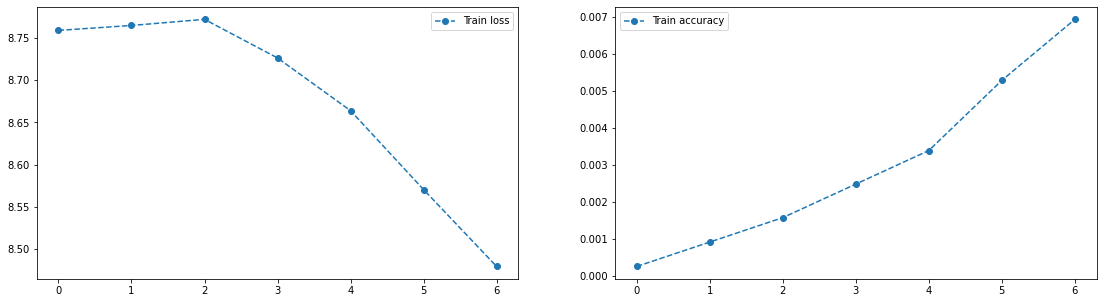

In [134]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19,5))
ax1.plot(history.epoch, history.history['loss'], 'o--', label='Train loss')

ax2.plot(history.epoch, history.history['accuracy'], 'o--' , label='Train accuracy')

ax1.legend()
ax2.legend()
f.show()

In [135]:
eval_ = model.evaluate(X_test, y_test)
print("Loss: {0:.5}".format(eval_[0]))
print("Accuracy: {0:.2%}".format(eval_[1]))

380/380 [==============================] - 2s 5ms/step - loss: 8.2371 - accuracy: 0.0143
Loss: 8.2371
Accuracy: 1.43%


Juts to shows popular words

In [121]:
!pip install wordcloud

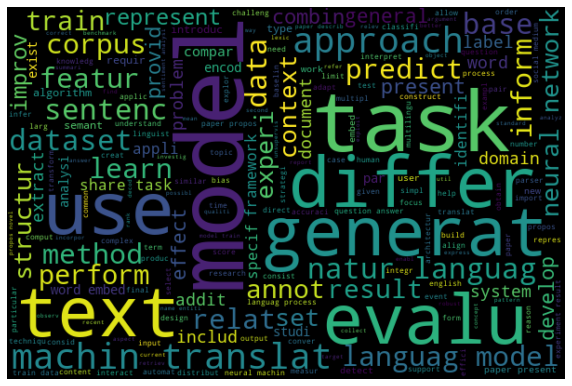

In [122]:

all_words_lem = ' '.join([word for word in data['abstract_title']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [123]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/Ulyasha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [124]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [125]:
fd.most_common(20)

[('model', 20821),
 ('languag', 12025),
 ('task', 11397),
 ('learn', 7523),
 ('word', 7270),
 ('data', 6762),
 ('method', 6659),
 ('propos', 6327),
 ('approach', 6275),
 ('perform', 6175),
 ('train', 6166),
 ('generat', 6035),
 ('translat', 6010),
 ('text', 5991),
 ('paper', 5574),
 ('result', 5524),
 ('evalu', 5316),
 ('dataset', 5301),
 ('improv', 4884),
 ('neural', 4857)]

In [126]:
fd.most_common()[-20:]

[('balustrad', 1),
 ('pierr', 1),
 ('vinken', 1),
 ('targetprompt', 1),
 ('httpsgithubcomibmnetabledataset', 1),
 ('netabl', 1),
 ('λequal', 1),
 ('requireallow', 1),
 ('acbima', 1),
 ('tanhcub', 1),
 ('topicallyrel', 1),
 ('lml', 1),
 ('npand', 1),
 ('nonnpanteced', 1),
 ('semanticallyvacu', 1),
 ('22x', 1),
 ('ratsqlgrappa', 1),
 ('10657', 1),
 ('erroranalysi', 1),
 ('chuck', 1)]